## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

In [4]:
!pip install xgboost

In [5]:
from xgboost import XGBClassifier 
from sklearn.svm import LinearSVC, SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix

import warnings
warnings. filterwarnings ("ignore")

## Import and read the data

In [7]:
df = pd.read_csv("/Users/babyengineer/Documents/Data Science/Diabetes Prediction Project/diabetes_prediction_dataset - diabetes_prediction_dataset.csv")

In [8]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Inspect the Dataset

In [10]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [11]:
df.shape

(100000, 9)

In [12]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [15]:
df.describe(include="object")

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [16]:
df.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


## Checking for Missing Values

In [18]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

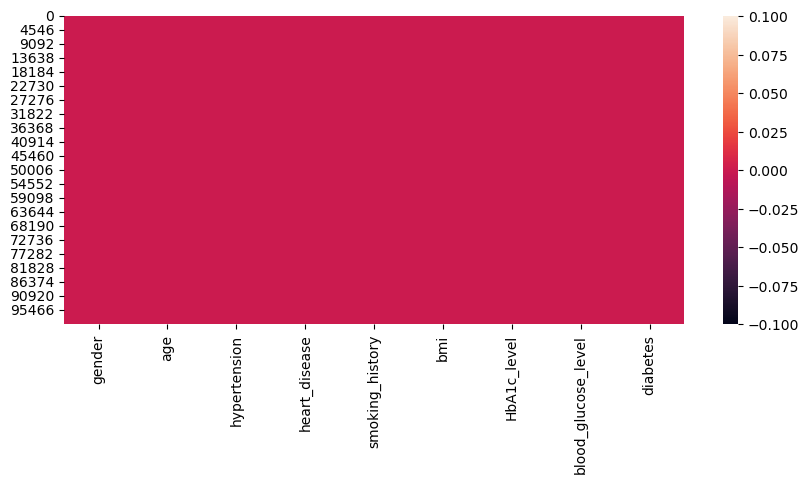

In [19]:
plt.figure(figsize =(10,4))
sns.heatmap(df.isna(), cbar=True, cmap="rocket")

## Check for duplicate

In [21]:
df.duplicated().sum()

3854

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Exploratory Data Analysis

In [25]:
sex = df["gender"].unique()
print(sorted(sex))

['Female', 'Male', 'Other']


In [26]:
hpt = df["hypertension"].unique()
print(sorted(hpt))

[0, 1]


In [27]:
hd = df["heart_disease"].unique()
print(sorted(hd))

[0, 1]


In [28]:
sh = df["smoking_history"].unique()
print(sorted(sh))

['No Info', 'current', 'ever', 'former', 'never', 'not current']


In [29]:
dia = df["diabetes"].unique()
print(sorted(dia))

[0, 1]


<Axes: xlabel='count', ylabel='gender'>

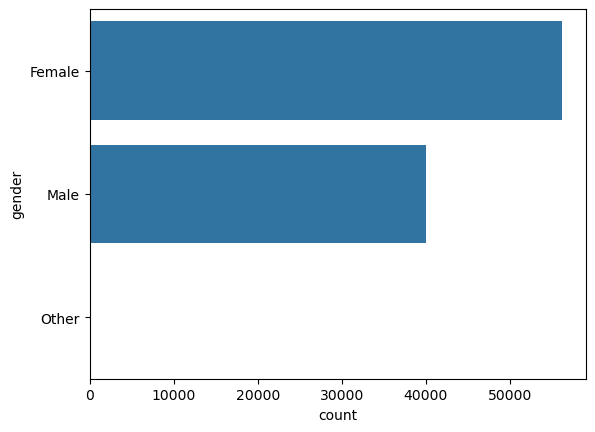

In [30]:
sns.countplot(df["gender"])

Text(0.5, 1.0, 'Total number of patients')

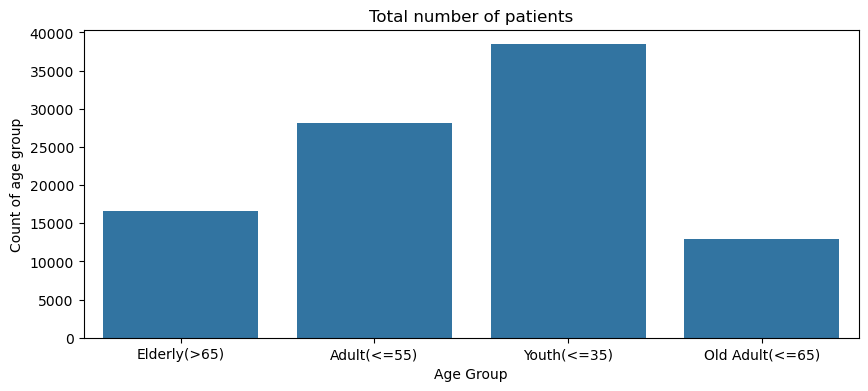

In [31]:
# Categorise the age

def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

df["age_bracket"] = df["age"].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize=(10,4))
sns.countplot(x="age_bracket", data=df)
plt.xlabel("Age Group")
plt.ylabel("Count of age group")
plt.title("Total number of patients")

Text(0.5, 1.0, 'Total number of patients')

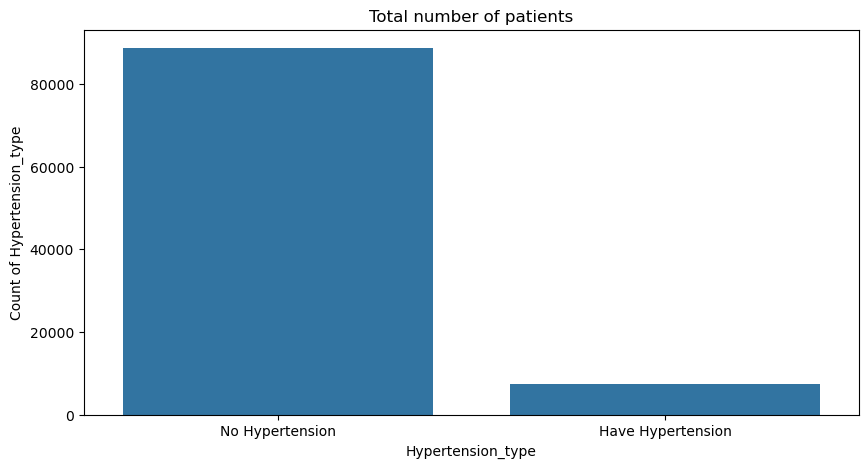

In [32]:
def Hypertension(HpT):
    if HpT == 1:
        return "Have Hypertension"
    else:
        return "No Hypertension"

df["Hypertension"] = df["hypertension"].apply(Hypertension)

# Investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x="Hypertension", data=df)
plt.xlabel("Hypertension_type")
plt.ylabel("Count of Hypertension_type")
plt.title("Total number of patients")

Text(0.5, 1.0, 'Total number of patients')

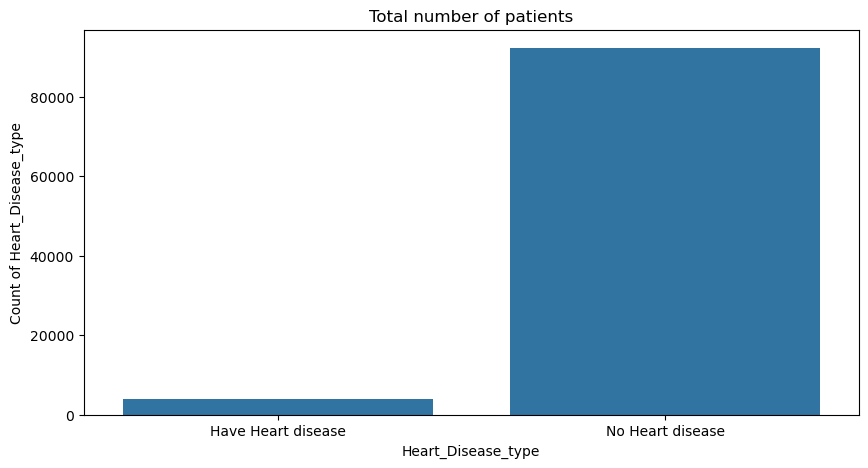

In [33]:
def heart(hd):
    if hd == 1:
        return "Have Heart disease"
    else:
        return "No Heart disease"

df["heart"] = df["heart_disease"].apply(heart)

# Investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x="heart", data=df)
plt.xlabel("Heart_Disease_type")
plt.ylabel("Count of Heart_Disease_type")
plt.title("Total number of patients")

<Axes: xlabel='count', ylabel='smoking_history'>

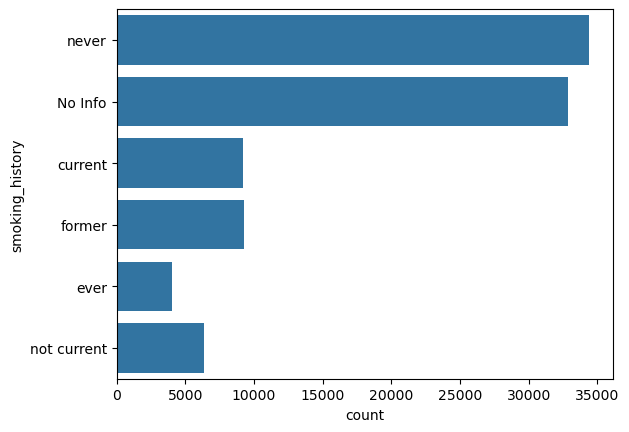

In [34]:
sns.countplot(df["smoking_history"])

Text(0.5, 1.0, 'Total number of patients')

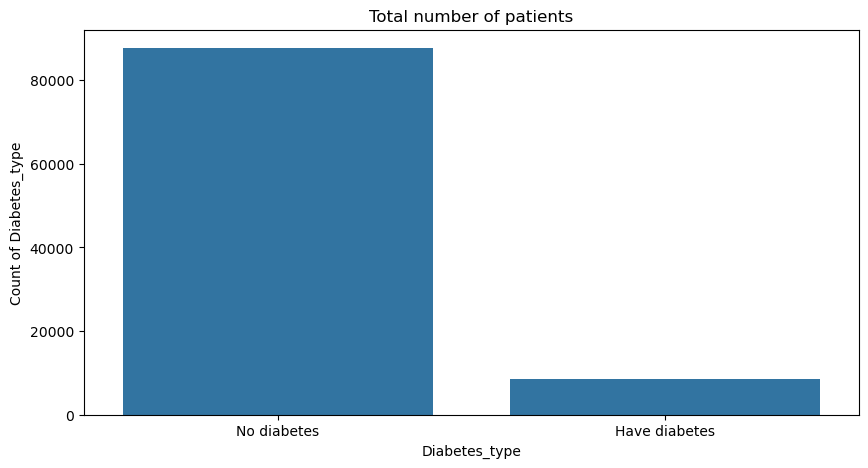

In [35]:
def diabete(diab):
    if diab == 1:
        return "Have diabetes"
    else:
        return "No diabetes"

df["diabete"] = df["diabetes"].apply(diabete)

# Investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x="diabete", data=df)
plt.xlabel("Diabetes_type")
plt.ylabel("Count of Diabetes_type")
plt.title("Total number of patients")

## Bivariate Analysis

Text(0.5, 1.0, 'Total number of patients')

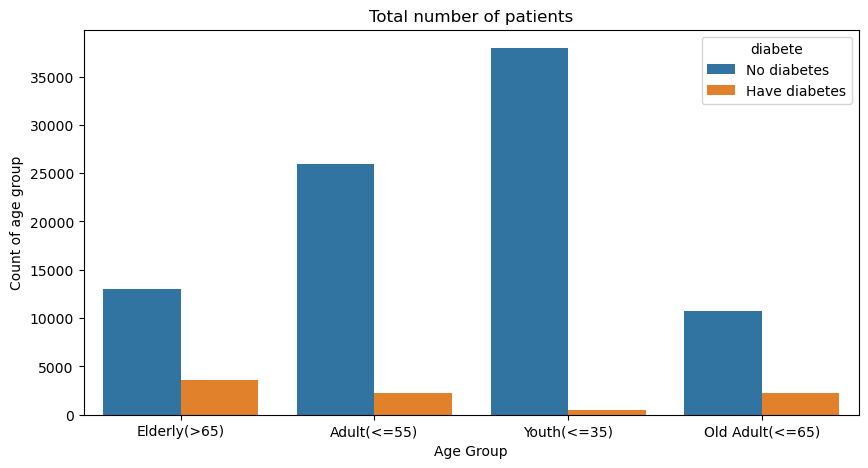

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x="age_bracket", data=df, hue="diabete")
plt.xlabel("Age Group")
plt.ylabel("Count of age group")
plt.title("Total number of patients")

Text(0.5, 1.0, 'Total number of patients')

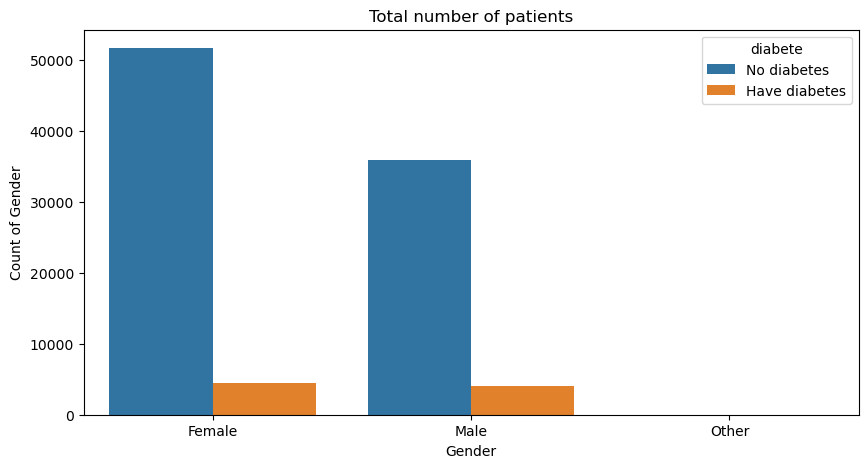

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x="gender", data=df, hue="diabete")
plt.xlabel("Gender")
plt.ylabel("Count of Gender")
plt.title("Total number of patients")

Text(0.5, 1.0, 'Total number of patients')

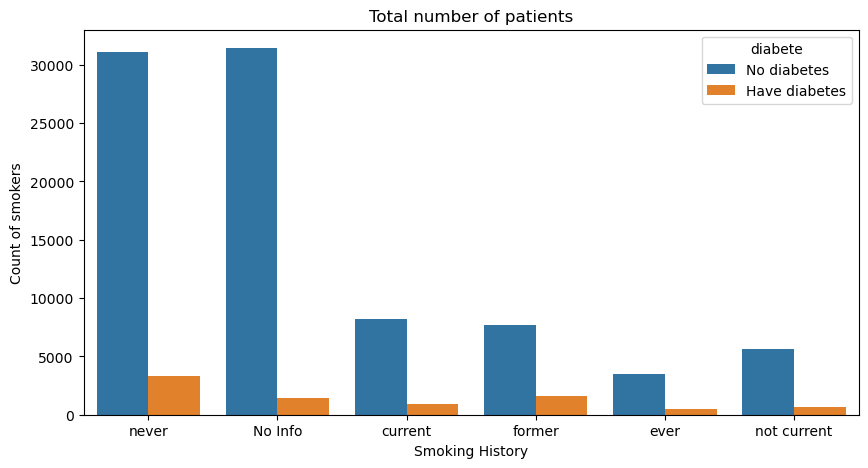

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x="smoking_history", data=df, hue="diabete")
plt.xlabel("Smoking History")
plt.ylabel("Count of smokers")
plt.title("Total number of patients")

Text(0.5, 1.0, 'Total number of patients')

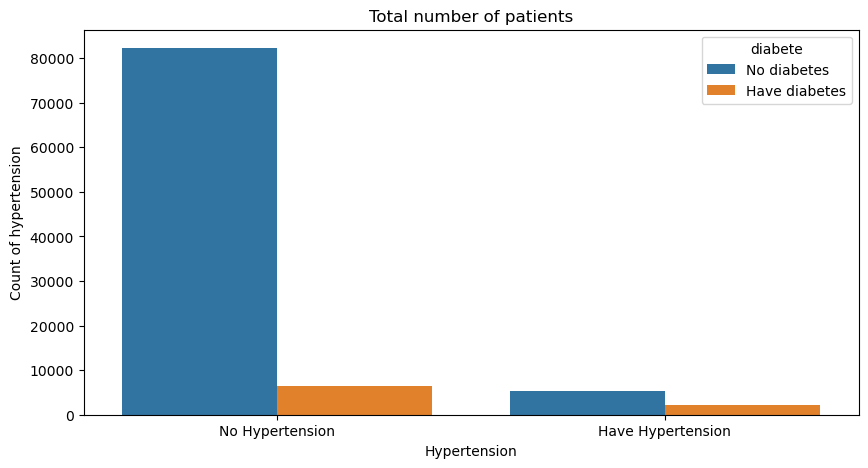

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x="Hypertension", data=df, hue="diabete")
plt.xlabel("Hypertension")
plt.ylabel("Count of hypertension")
plt.title("Total number of patients")

Text(0.5, 1.0, 'Total number of patients')

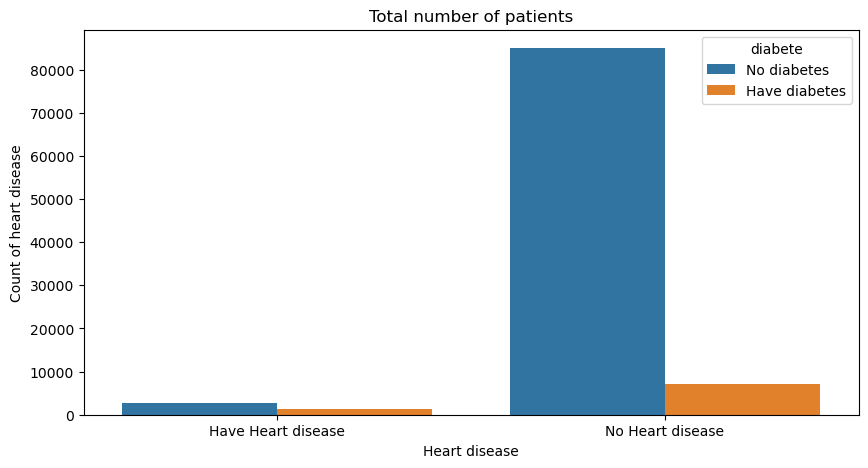

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x="heart", data=df, hue="diabete")
plt.xlabel("Heart disease")
plt.ylabel("Count of heart disease")
plt.title("Total number of patients")

## Multivariate Analysis

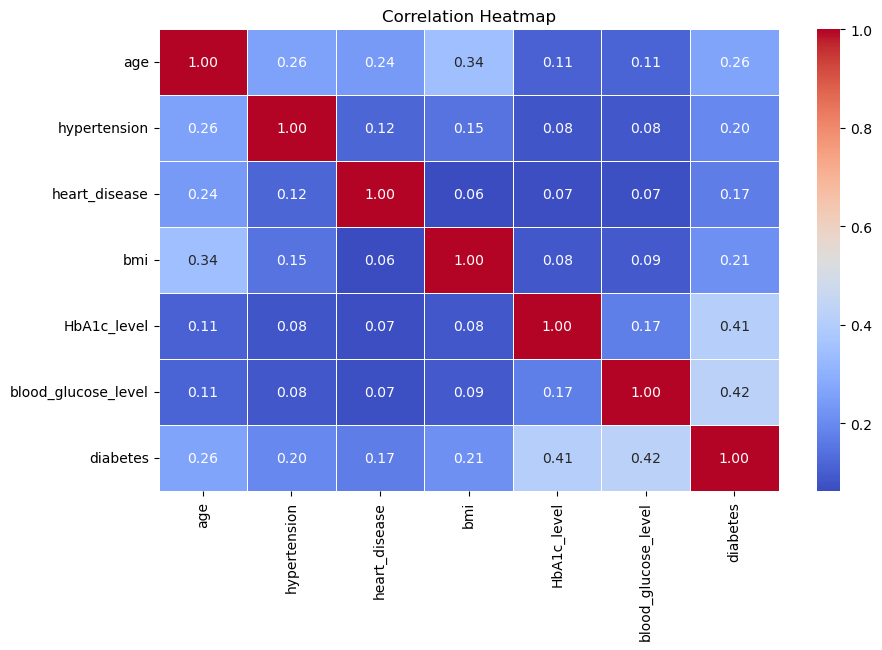

In [43]:
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

In [45]:
label = df["diabetes"]

In [46]:
df1 = df[["gender", "age", "hypertension", "heart_disease", "smoking_history", "bmi", "HbA1c_level", "blood_glucose_level", "diabetes"]]

In [47]:
features = df1.drop("diabetes", axis=1)

In [48]:
df1.drop("diabetes", axis=1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


## Label Encoding

In [50]:
categorical_data = df1.select_dtypes(include=['object', 'category'])

In [51]:
categorical_data.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [52]:
encoder = LabelEncoder()

In [53]:
encoder.fit_transform(df1["gender"])

array([0, 0, 1, ..., 1, 0, 0])

In [54]:
encoder.fit_transform(df1["smoking_history"])

array([4, 0, 4, ..., 3, 4, 1])

In [55]:
for column_name in categorical_data:
    features[column_name] = encoder.fit_transform(df1[column_name])

In [56]:
features.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


## Machine Learning

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [59]:
len(X_train) == len(y_train)

True

In [60]:
model = LogisticRegression(random_state=42)

In [61]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [62]:
# Make predictions
predictions = model.predict(X_test)

In [63]:
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
y_test.values

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)

In [67]:
y_train.value_counts()

diabetes
0    70155
1     6761
Name: count, dtype: int64

In [68]:
y_test.value_counts()

diabetes
0    17509
1     1721
Name: count, dtype: int64

In [69]:
print(report)

              precision    recall  f1-score   support

           0    0.96109   0.98606   0.97342     17509
           1    0.80727   0.59384   0.68430      1721

    accuracy                        0.95096     19230
   macro avg    0.88418   0.78995   0.82886     19230
weighted avg    0.94732   0.95096   0.94754     19230



Text(0.5, 23.52222222222222, 'Actual Value')

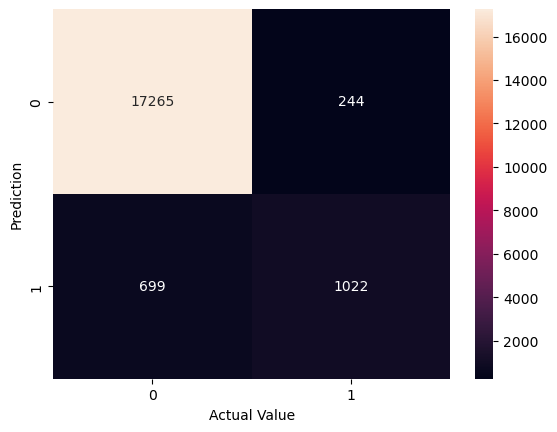

In [70]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

In [71]:
len(df1.select_dtypes(include="number").columns)

7

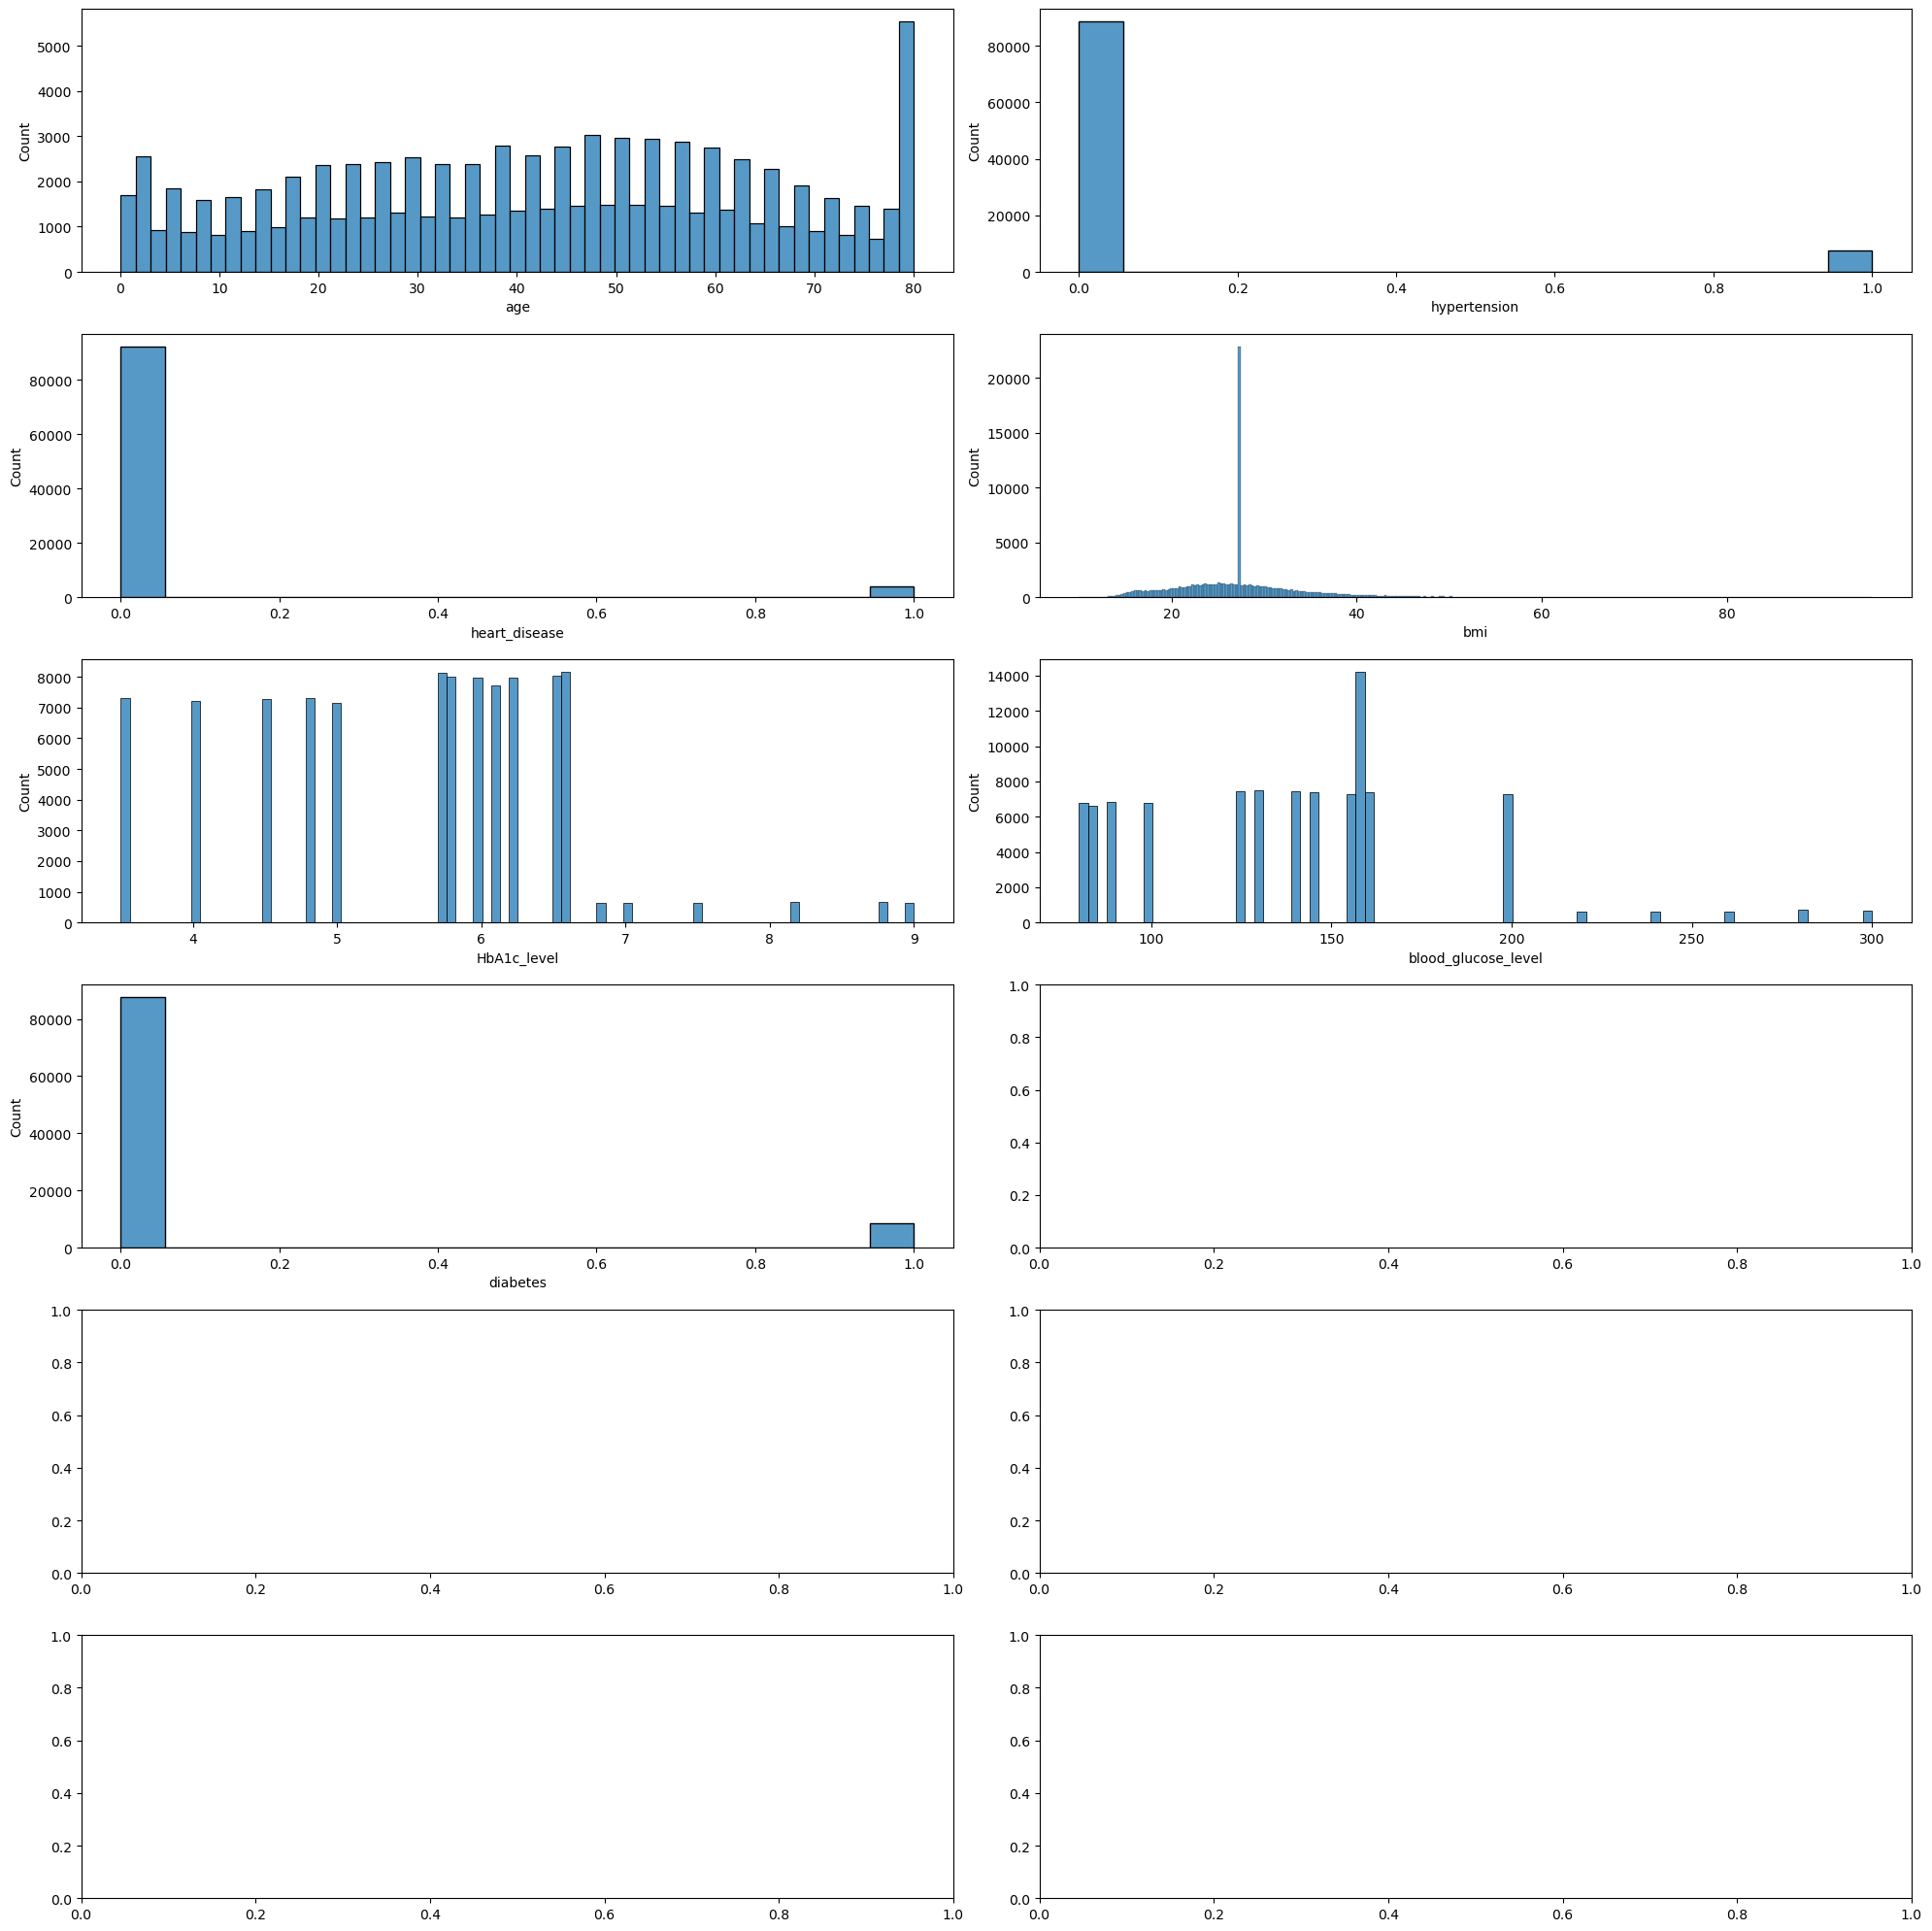

In [72]:
fig, position = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(df1.select_dtypes(include="number")):
    sns.histplot(df1[column_name], ax=position[index])

plt.tight_layout()
plt.show()

In [73]:
# Initialize the scaler
scaler = RobustScaler()

In [74]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0    0.96411   0.98955   0.97666     17509
           1    0.85465   0.62522   0.72215      1721

    accuracy                        0.95694     19230
   macro avg    0.90938   0.80738   0.84941     19230
weighted avg    0.95431   0.95694   0.95388     19230



Text(0.5, 23.52222222222222, 'Actual Value')

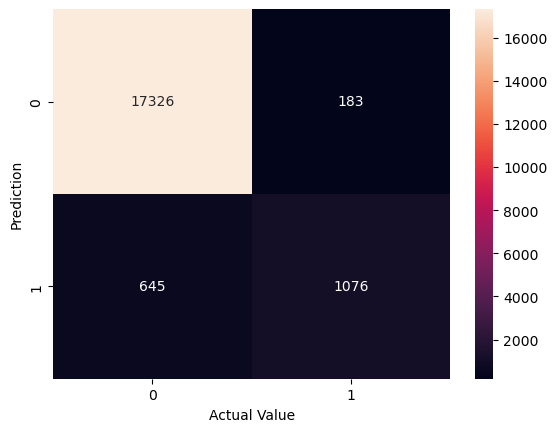

In [75]:
# Initialize the model

model = LogisticRegression(random_state=42)
# Train the model
model.fit(X_train_scaled, y_train)
# Make predictions
predictions = model.predict(X_test_scaled)
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     17509
           1       0.60      0.77      0.68      1721

    accuracy                           0.93     19230
   macro avg       0.79      0.86      0.82     19230
weighted avg       0.94      0.93      0.94     19230



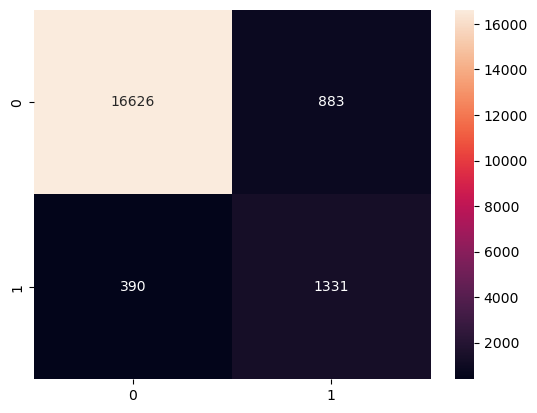

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     17509
           1       0.66      0.74      0.70      1721

    accuracy                           0.94     19230
   macro avg       0.82      0.85      0.83     19230
weighted avg       0.95      0.94      0.94     19230



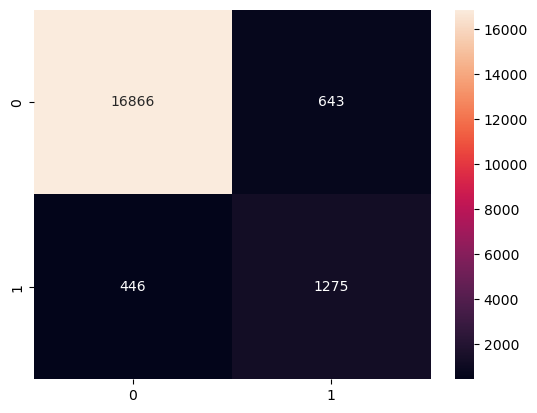

<-- k-Nearest Neighbors -->
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.88      0.63      0.73      1721

    accuracy                           0.96     19230
   macro avg       0.92      0.81      0.85     19230
weighted avg       0.96      0.96      0.96     19230



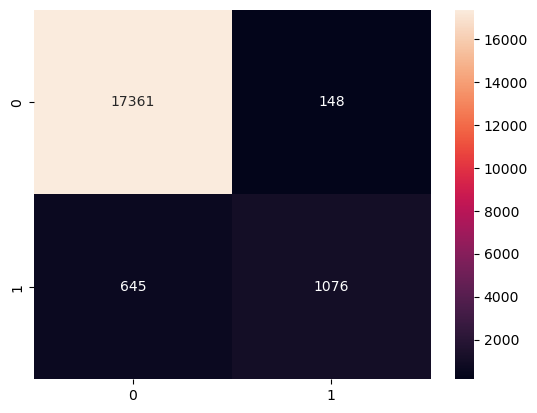

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.71      0.74      0.72      1721

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



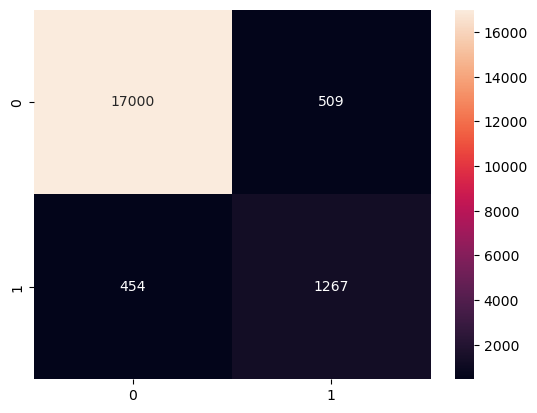

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.95      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



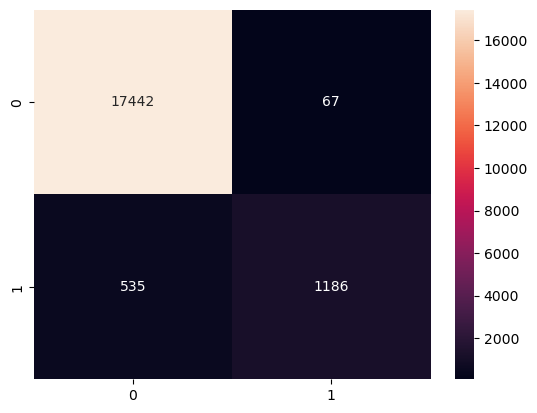

<-- Gradient Boosting -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.99      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



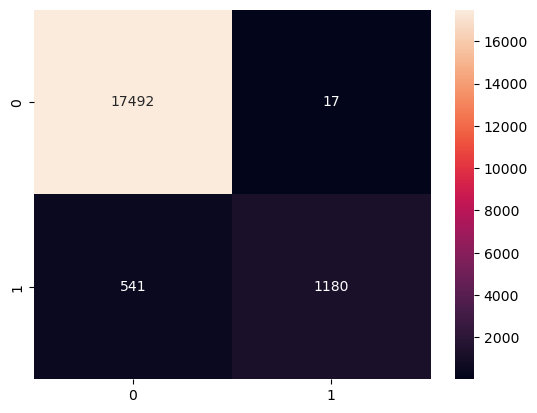

<-- AdaBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       1.00      0.67      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



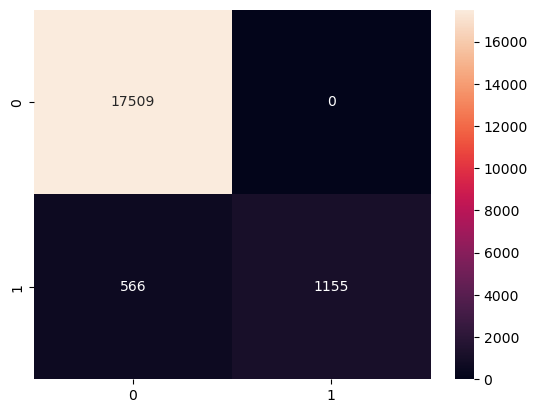

<-- XGBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.96      0.70      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.85      0.89     19230
weighted avg       0.97      0.97      0.97     19230



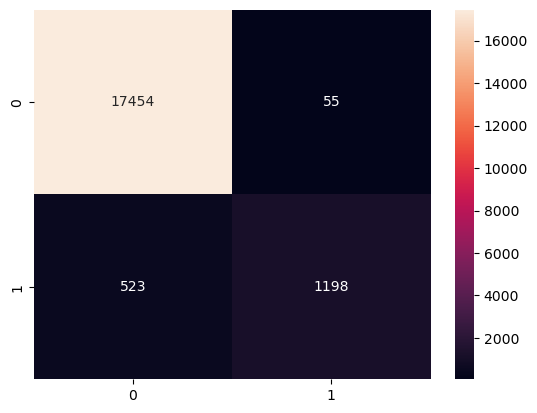

In [76]:
class_weights = {0: 1, 1: 4} 

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [KNeighborsClassifier(), 'k-Nearest Neighbors'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

In [77]:
!pip install imbalanced-learn

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
# Separate features and target
X = df1.drop("diabetes", axis=1)
y = df1["diabetes"]

In [80]:
scaler = RobustScaler()
X = scaler.fit_transform(features)

In [81]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [82]:
y_resampled.value_counts()

diabetes
0    87664
1    87664
Name: count, dtype: int64

In [83]:
y_resampled.value_counts(normalize=True)*100

diabetes
0    50.0
1    50.0
Name: proportion, dtype: float64

<Axes: xlabel='diabetes', ylabel='count'>

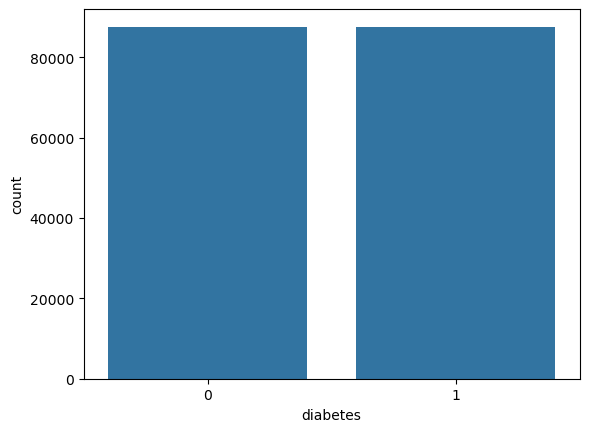

In [84]:
sns.countplot(x=y_resampled)

In [85]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [86]:
from datetime import datetime

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     17439
           1       0.89      0.88      0.89     17627

    accuracy                           0.89     35066
   macro avg       0.89      0.89      0.89     35066
weighted avg       0.89      0.89      0.89     35066



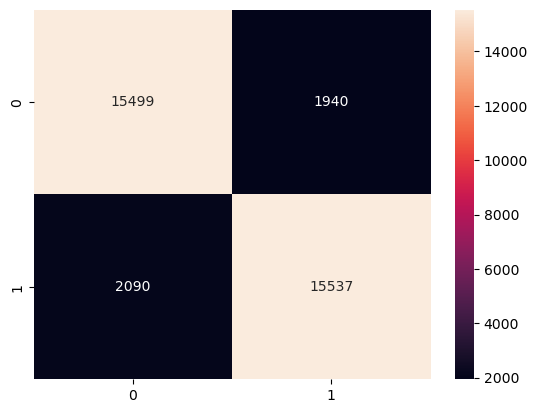

===============Took: 0 seconds to train===============
===============SGD Classifiers===============
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89     17439
           1       0.89      0.88      0.89     17627

    accuracy                           0.89     35066
   macro avg       0.89      0.89      0.89     35066
weighted avg       0.89      0.89      0.89     35066



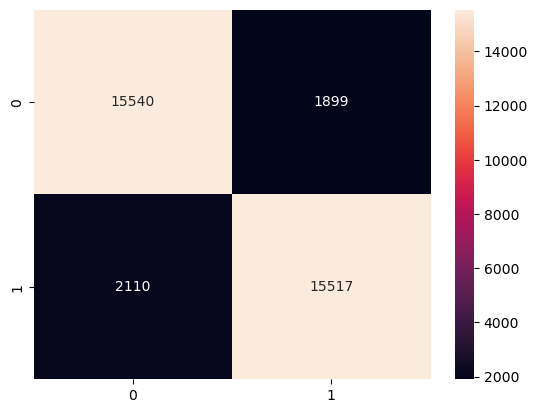

===============Took: 0 seconds to train===============
===============k-Nearest Neighbors===============
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     17439
           1       0.92      0.99      0.95     17627

    accuracy                           0.95     35066
   macro avg       0.95      0.95      0.95     35066
weighted avg       0.95      0.95      0.95     35066



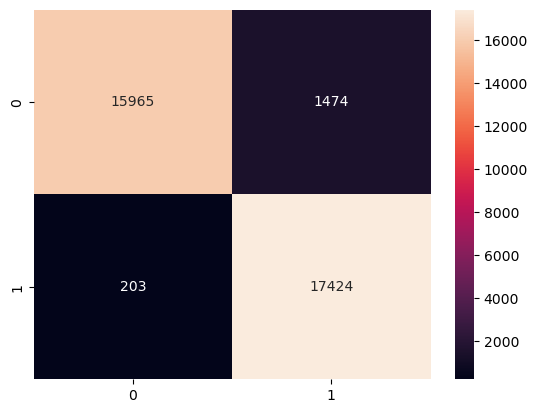

===============Took: 0 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     17439
           1       0.96      0.97      0.97     17627

    accuracy                           0.96     35066
   macro avg       0.96      0.96      0.96     35066
weighted avg       0.96      0.96      0.96     35066



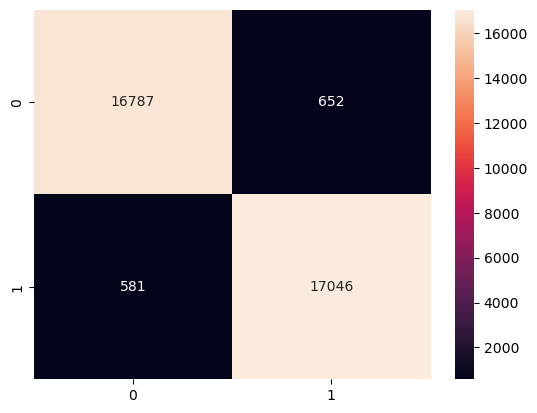

===============Took: 0 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17439
           1       0.98      0.98      0.98     17627

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



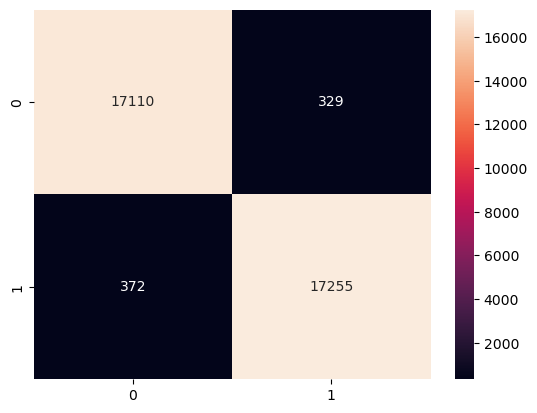

===============Took: 6 seconds to train===============
===============Gradient Boosting===============
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     17439
           1       0.97      0.95      0.96     17627

    accuracy                           0.96     35066
   macro avg       0.96      0.96      0.96     35066
weighted avg       0.96      0.96      0.96     35066



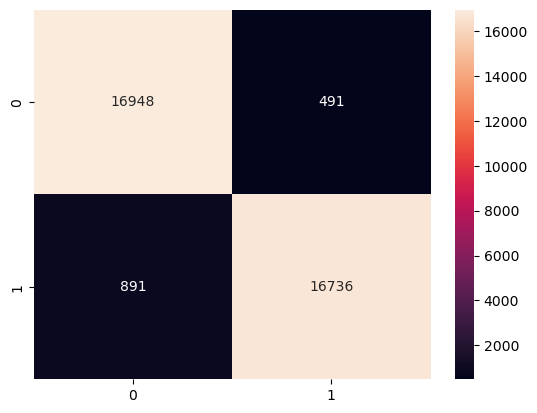

===============Took: 10 seconds to train===============
===============AdaBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91     17439
           1       0.90      0.93      0.92     17627

    accuracy                           0.91     35066
   macro avg       0.91      0.91      0.91     35066
weighted avg       0.91      0.91      0.91     35066



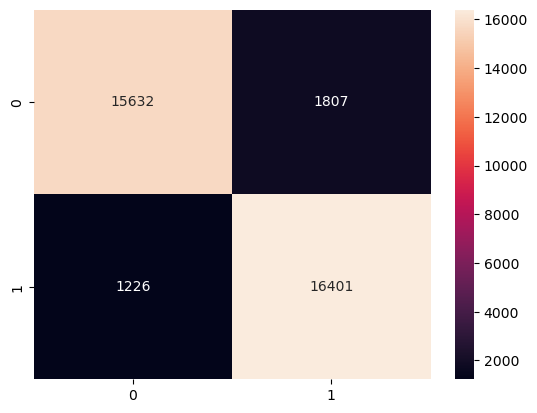

===============Took: 2 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17439
           1       0.99      0.96      0.98     17627

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



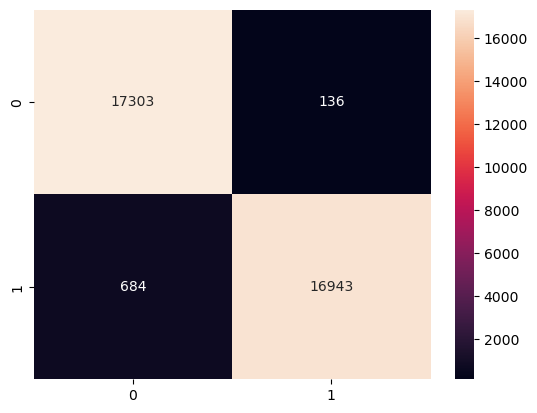

===============Took: 0 seconds to train===============


In [87]:
class_weights = "balanced"

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [KNeighborsClassifier(), 'k-Nearest Neighbors'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)

In [88]:
classifiers

[[LogisticRegression(class_weight='balanced', random_state=42),
  'Logistic Regression'],
 [SGDClassifier(class_weight='balanced', random_state=42), 'SGD Classifiers'],
 [KNeighborsClassifier(), 'k-Nearest Neighbors'],
 [DecisionTreeClassifier(class_weight='balanced', random_state=42),
  'Decision Tree'],
 [RandomForestClassifier(class_weight='balanced', random_state=42),
  'Random Forest'],
 [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
 [AdaBoostClassifier(algorithm='SAMME', random_state=42), 'AdaBoost'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='mlogloss',
                feature_types=None, feature_weights=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, m

In [89]:
classifiers[4][0].feature_importances_

array([0.00531761, 0.18512881, 0.01904922, 0.01001605, 0.05106477,
       0.10124663, 0.3543609 , 0.27381602])

In [90]:
importances = classifiers[4][0].feature_importances_
importances

array([0.00531761, 0.18512881, 0.01904922, 0.01001605, 0.05106477,
       0.10124663, 0.3543609 , 0.27381602])

In [91]:
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,gender,0.005318
1,age,0.185129
2,hypertension,0.019049
3,heart_disease,0.010016
4,smoking_history,0.051065
5,bmi,0.101247
6,HbA1c_level,0.354361
7,blood_glucose_level,0.273816


In [92]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
6,HbA1c_level,0.354361
7,blood_glucose_level,0.273816
1,age,0.185129
5,bmi,0.101247
4,smoking_history,0.051065
2,hypertension,0.019049
3,heart_disease,0.010016
0,gender,0.005318


<Axes: xlabel='Importance', ylabel='Feature'>

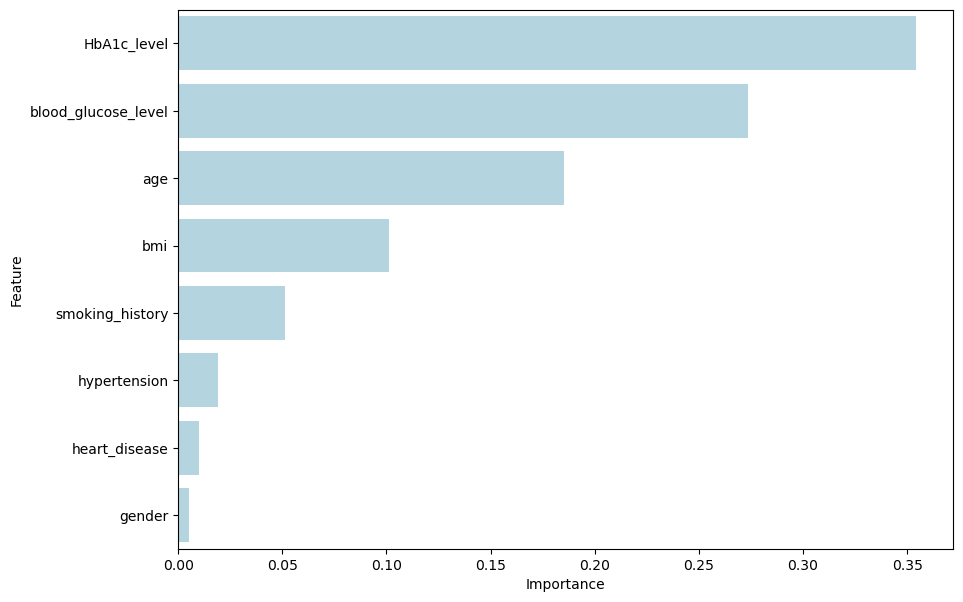

In [93]:
plt.figure(figsize=(10, 7))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='lightblue')

<Axes: >

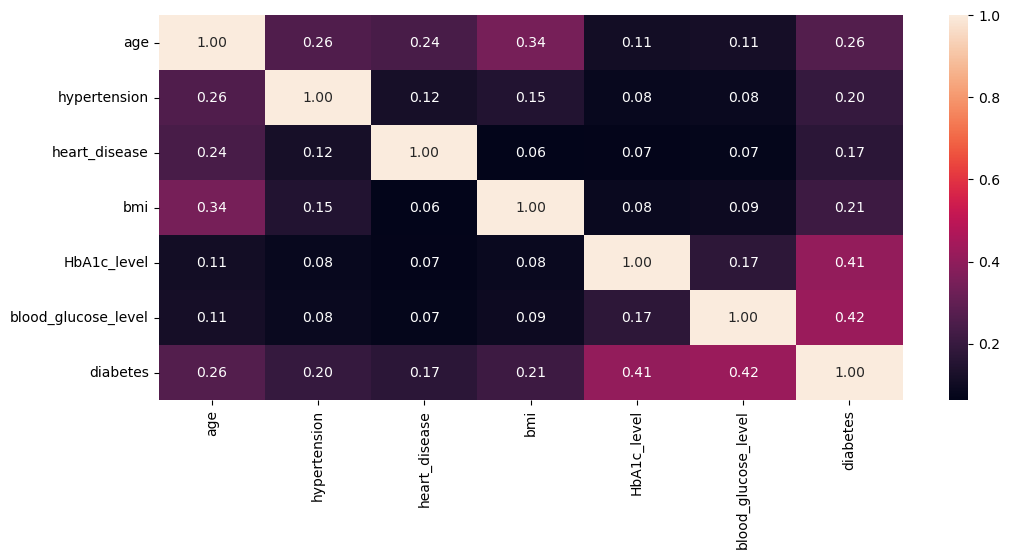

In [94]:
plt.figure(figsize=(12, 5))
sns.heatmap(df1.corr(numeric_only=True), annot=True, fmt=".2f")

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
parameter_grid = {
    "max_depth": [20, 30, 50],
    "min_samples_split": [5, 7, 10],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, "balanced"]
}

In [97]:
grid_search = GridSearchCV(estimator=classifiers[4][0], param_grid=parameter_grid, cv=5, scoring="recall")

In [98]:
from joblib import dump

dump(model, 'Diabetes.joblib')

['Diabetes.joblib']